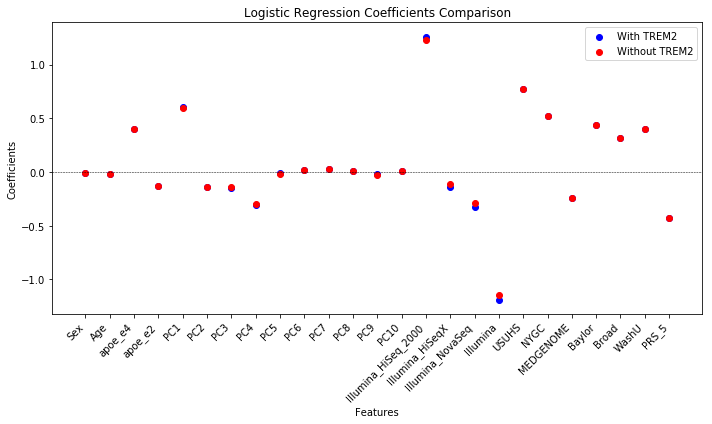

In [9]:
import matplotlib.pyplot as plt

# Load coefficients from files
coefficients_with_covariates = {}
with open("coefficients_TREM2.txt", "r") as file:
    lines = file.readlines()
    intercept_with_covariates = float(lines[0].split(":")[1].strip())
    for line in lines[2:]:
        feature, coef = line.split(":")
        coefficients_with_covariates[feature.strip()] = float(coef.strip())

coefficients_without_trem2 = {}
with open("coefficients_with_covariates.txt", "r") as file:
    lines = file.readlines()
    intercept_without_trem2 = float(lines[0].split(":")[1].strip())
    for line in lines[2:]:
        feature, coef = line.split(":")
        coefficients_without_trem2[feature.strip()] = float(coef.strip())

# Prepare data for plotting
feature_names = list(coefficients_with_covariates.keys())
coef_with_covariates = [coefficients_with_covariates[feature] for feature in feature_names]
coef_without_trem2 = [coefficients_without_trem2.get(feature, 0) for feature in feature_names]

# Plot coefficients comparison as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(feature_names, coef_with_covariates, color='b', label='With TREM2', marker='o')
plt.scatter(feature_names, coef_without_trem2, color='r', label='Without TREM2', marker='o')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Coefficients Comparison')
plt.legend()
plt.tight_layout()
plt.show()
